In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'axes.labelsize': 'large',
    'font.size': 14,
    'lines.linewidth': 2.5})

#colors for plots, to fit with theme for prettiness
color1 = '#326e5e' #dark-turquoise
color2 = '#63c4ab' #turquoise
color3 = '#AFE4DE'

c_list_turq = [color1,color2,color3]

#donders color scheme
color1 = '#8b0203' #dark red
color2 = '#ba1319' #medium red
color3 = '#ed1c24' #light red
color4 = '#dd8a8d' #very light red (light red low opacity)

c_list_red = [color1,color2,color3,color4]

Int64Index([100, 200, 500, 1000], dtype='int64')


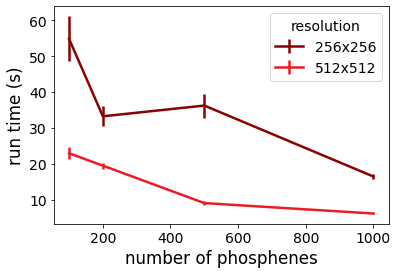

In [7]:
runtimes = pd.read_csv('../results/runtimes.csv',sep=';',index_col=0)
print(runtimes.index)

res256 = runtimes.iloc[:,:5].to_numpy()
res512 = runtimes.iloc[:,5:].to_numpy()
# res256

res256_mean = (100/res256).mean(axis=1)
res256_std = (100/res256).std(axis=1)
res256_error = res256_std/np.sqrt(res256.shape[1])

res512_mean = (100/res512).mean(axis=1)
res512_std = (100/res512).std(axis=1)
res512_error = res512_std/np.sqrt(res512.shape[1])

fig = plt.figure(figsize=(6,4))
# plt.plot(runtimes.index,res256_mean, c=c_list_red[1])
plt.errorbar(runtimes.index,res256_mean,res256_error, c=c_list_red[0],label='256x256')
# plt.plot(runtimes.index,res512_mean, c=c_list_red[2])
plt.errorbar(runtimes.index,res512_mean,res512_error, c=c_list_red[2],label='512x512')
plt.ylabel('frame rate (fps)')
plt.xlabel('number of phosphenes')
# plt.ylim([0,17.5])
plt.legend(title='resolution')
plt.show()

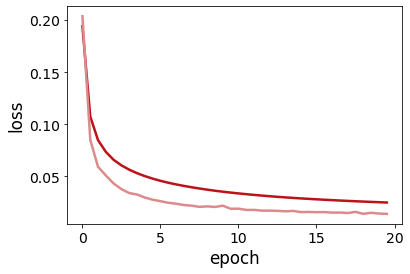

In [24]:
base_path = '../results/Jul07_11-19_chars_'

loss = pd.read_csv(base_path+'training_total.csv')

loss.set_index('Step', inplace=True)
loss.drop('Wall time', axis=1,inplace=True)
loss.rename(columns={'Value':'training_total'},inplace=True)
loss.head()

files = ['training_recon','training_phosrep','val_total','val_recon','val_phosrep']
for file in files:
    l = pd.read_csv(base_path+file+'.csv')
    l.set_index('Step', inplace=True)
    # print(l.head())
    loss[file] = l['Value']

# print(loss.head())
# loss[['training_total','val_total']].plot()
fig = plt.figure(figsize=(6,4))
plt.plot(loss.index/198,loss['training_total'],c=c_list_red[1], label='training')
plt.plot(loss.index/198,loss['val_total'],c=c_list_red[3], label='validation')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.plot(loss)
plt.show()


In [ ]:
#de-normalize ADE20K images
# invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
#                                                      std = [ 1/0.229, 1/0.224, 1/0.225 ]),
#                                 transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
#                                                      std = [ 1., 1., 1. ]),
#                                ])

# inv_tensor = invTrans(inp_tensor)

(5, 1, 128, 128)


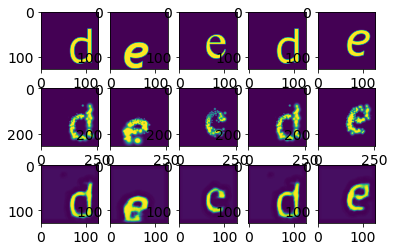

In [14]:
out_path = 'out/out/demo/'
input = np.load(out_path+'exp1_chars_orig_imgs.npy')
phos = np.load(out_path+'exp1_chars_phos_imgs.npy')
recon = np.load(out_path+'exp1_chars_recon_imgs.npy')
print(input.shape)

fig, axs = plt.subplots(3,5)

for c in range(input.shape[0]):
    axs[0,c].imshow(input[c,0,:,:])
    axs[1,c].imshow(phos[c,0,:,:])
    axs[2,c].imshow(recon[c,0,:,:])
    
plt.show()

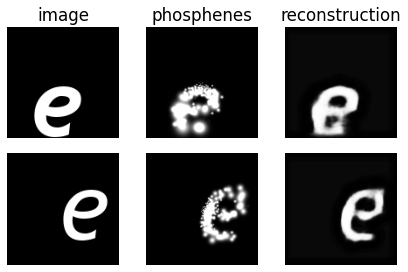

In [15]:
sample = [1,4]
fig, axs = plt.subplots(len(sample),3,figsize=(6,4))

for i,s in enumerate(sample):
    axs[i,0].imshow(input[s,0,:,:],cmap='gray')
    axs[i,1].imshow(phos[s,0,:,:],cmap='gray')
    axs[i,2].imshow(recon[s,0,:,:],cmap='gray')

for ax in axs.flatten():
    ax.axis('off')

axs[0,0].set_title('image')
axs[0,1].set_title('phosphenes')
axs[0,2].set_title('reconstruction')

plt.tight_layout()
plt.show()

(5, 1, 128, 128)


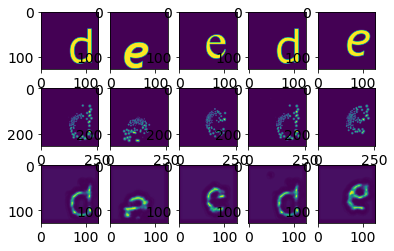

In [3]:
out_path = 'out/out/demo/'
input = np.load(out_path+'binned_exp1_chars_binned_orig_imgs.npy')
phos = np.load(out_path+'binned_exp1_chars_binned_phos_imgs.npy')
recon = np.load(out_path+'binned_exp1_chars_binned_recon_imgs.npy')
print(input.shape)

fig, axs = plt.subplots(3,5)

for c in range(input.shape[0]):
    axs[0,c].imshow(input[c,0,:,:])
    axs[1,c].imshow(phos[c,0,:,:])
    axs[2,c].imshow(recon[c,0,:,:])
    
plt.show()

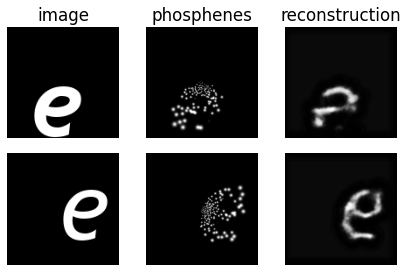

In [4]:
sample = [1,4]
fig, axs = plt.subplots(len(sample),3,figsize=(6,4))

for i,s in enumerate(sample):
    axs[i,0].imshow(input[s,0,:,:],cmap='gray')
    axs[i,1].imshow(phos[s,0,:,:],cmap='gray')
    axs[i,2].imshow(recon[s,0,:,:],cmap='gray')

for ax in axs.flatten():
    ax.axis('off')

axs[0,0].set_title('image')
axs[0,1].set_title('phosphenes')
axs[0,2].set_title('reconstruction')

plt.tight_layout()
plt.show()